<h1 align="center"> Credit Card Fraud Detection</h1>

## Introduction:    
The data is about transactions made by credit card and downloaded from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). In this notebook, we will use various predictive model to detect the fraud trascation among the normal transaction. 

## Goals:    
- Understand the data distributions and conduct basic exploratory data analysis.
- Use undersampling and oversampling method to create 50/50 sub-dataframe ratio of Fraud transctions and no-fraud transactions.
- Use various prediction models and decide which one performs the best.    

## Outline
<b>1. Understanding data</b>    
1.1 Gather Sense of Data      
    a) loading the data    
    b) EDA    
     
<b>2. Preprocessing data and modeling</b>  
2.1 Scalling    
2.2 Splitting data    
2.3 Naive Classifier    
2.4 Undersampling    
    a) Logistic Regression    
    b) Random Forest    
    c) Neural Network      
2.5 Oversampling     
    a) Logistic Regression     
    b) Random Forest     
    c) Neural Network      

<b>3. Prediction Evaluation</b>  
3.1 Comaprison models using Undersampling     
3.2 Comparison models using Oversampling     

<b>4. Conclusion</b>  

## 1. Understanding Data    
### 1.1 Gather Sense of Data    

The first thing to do is to get sense of our data. According to the description, due to the confidentiality issues, the original features and information about the data are unknown. V1, V2,...,V28 are the principal components obtained with PCA. Except for Time and Amount have not been transformed. 

### Summary:
- There is no 'Null' value      
- Fraud transaction is small, with mean of 122 and 256 standard deviation.    
- 99.93% of the data are no-fraud transaction (284315 out of 284807), and 0.17% of the data are fraud transaction (492 out of 284807).   
- The fraud transaction amount and fraud transaction time has the same distribution shape as all transaction amount and all transaction time. The distribution of transaction and fraud transaction are right skewed, and the distribution of transaction time and fraud transaction time are multimodel distribution.    

#### a) Loading data

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit = pd.read_csv('creditcard.csv')
df = credit.copy()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### b) EDA

* __Is there any Null Values? If any, we need to replace them__

In [3]:
df.isnull().sum().any()

False

There is no missing value in the data

* __Summary of statistics for the meaningful Variables__

In [4]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


* __Statistics for the amount of fraud trasction__

In [5]:
df[df.Class==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The average amount of fraud transcation is around 88 with standard deviation of 250 which is involve large amount transactions

* __what is the distribution of the amount and time__

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#percentage of no-fraud records
noFraudPer = round(df['Class'].value_counts()[0]/len(df['Class'])*100,2)
#percentage of fraud records
FraudPer = round(df['Class'].value_counts()[1]/len(df['Class'])*100,2)

print('No Frauds:', noFraudPer, '% of the dataset')
print('Frauds:', FraudPer, '% of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


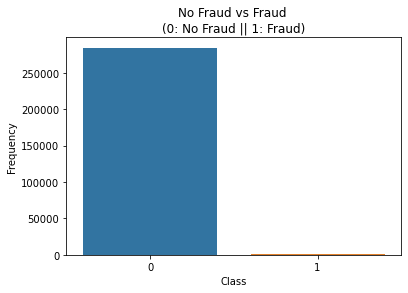

In [8]:
sns.countplot('Class', data = df)
plt.title('No Fraud vs Fraud \n(0: No Fraud || 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

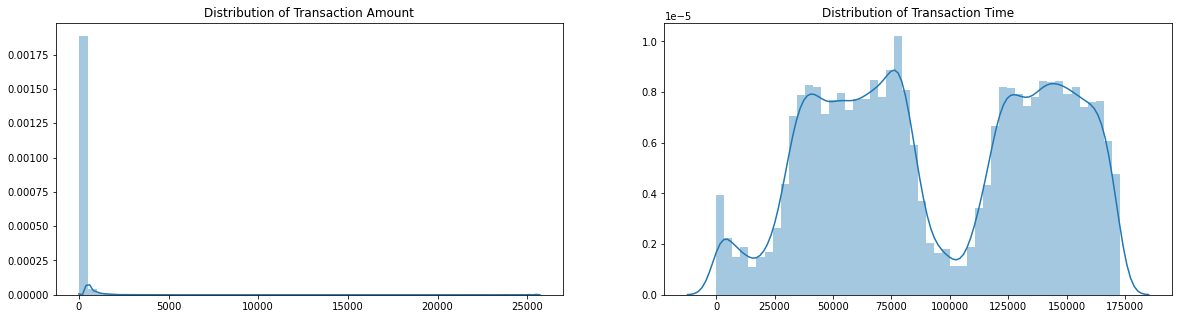

In [9]:
#define 1x2 plot on the same canvas
fig, ax = plt.subplots(1,2, figsize = (20,5))

#retrieve the value to be plotted
amount_value = df['Amount'].values
time_value = df['Time'].values

#plot distriubtion
sns.distplot(amount_value, ax = ax[0])
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(time_value, ax = ax[1])
ax[1].set_title('Distribution of Transaction Time')

plt.show()

* __what is the distribution of the amount and time of the fraud transaction__

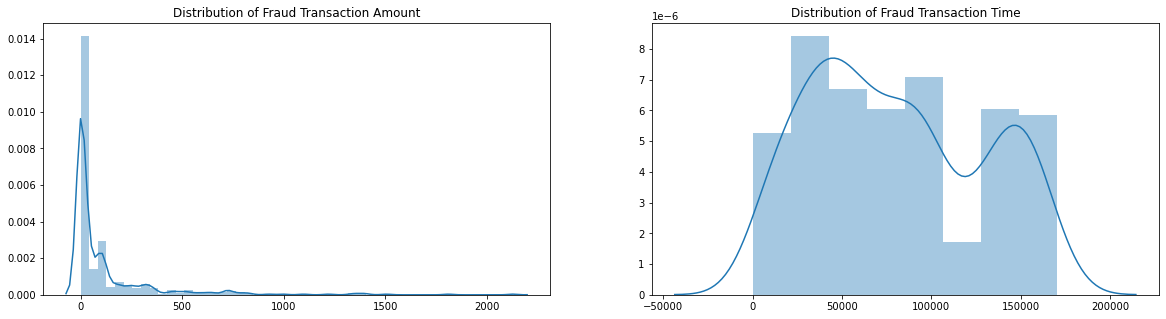

In [10]:
#define 1x2 plot on the same canvas
fig, ax = plt.subplots(1,2, figsize = (20,5))

#retrieve the value to be plotted
amount_value = df[df.Class==1]['Amount'].values
time_value = df[df.Class==1]['Time'].values

#plot distriubtion
sns.distplot(amount_value, ax = ax[0])
ax[0].set_title('Distribution of Fraud Transaction Amount')

sns.distplot(time_value, ax = ax[1])
ax[1].set_title('Distribution of Fraud Transaction Time')

plt.show()



## 2. Preprocessing data

We will do two things in this steps: scalling and splitting the data.    
1. Scalling: amount, time are various, and we should standardized it.
2. Splitting: in order to build prediction model, we will split data into train and test. We will use train data to train the model and test data to test the model. Since the data is not a imbalanced dataset, we need to take some techniques to balance the data before splitting them.

### Summary: 
We first sacle the amount and time with RobustScaler from sklearn.processing since RobustScaler is less prone to outliers.      
      
Then we split the data into train and test dataset. Since the data is very imbalanced, a naive model shows that the accuracy of the naive model is already 99.83 and is exactly the same as the percentage of the no-fraud transcation. In this case, accuracy is not reliable matrix and we should use other metrix to evaluate the model, such as f1 socre, ROC or confusion maxtrix.     
In order to balance the data, we took two methods:
- Undersampling    
    - We will downsize the no-fraud transaction to match the number of fraud transaction, so that we will have 50/50 ratio of fraud vs no-fraud transaction dataset. 
- Oversampling    
    - In this method, we will upsize the fraud transaction by replace themselves in the dataset to reach the 50/50 ratio of fraud vs. no-fraud transaction dataset.   

After we create the balanced data, we then split the balance data again into train and test data and use the train dataset from balanced dataset to train our model. However, we will still use original test dataset to validate the model. This is because our main goal is to fit the model either with the imbalanced dataframe, which is the real-life situation, to detect the fraud.

Logsitic regression, random forest regression and neural networks are used to build model for undersampled and oversampled dataset. 

### 2.1 Scalling

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Scaled_Amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [12]:
df.drop(['Time','Amount'], axis=1, inplace = True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


### 2.2 Splitting Data

The final stage is to test the model with the test data from the imbalanced dataset. Thus, we also need to split the imbalanced data, and keep imbalanced test data for testing stage. Then we can balance the train data with the techniques. 

In [13]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis = 1)
y = df['Class']

seed = 42
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = seed)

#check the number of data in each set
print('number of data in xtrain:', len(xtrain))
print('number of data in ytrain:', len(ytrain))
print('number of data in xtest:', len(xtest))
print('number of data in ytest:', len(ytest))

number of data in xtrain: 227845
number of data in ytrain: 227845
number of data in xtest: 56962
number of data in ytest: 56962


### 2.3 Naive Classifier
we will use a DummyClassifier from Scikit-learn and use the 'most_frequent' strategy that will always predict the most observed in the traning dataset. Then we use repeated k-fold cross-validation to ensure each split of the dataset has the same class distribution as the training dataset.

In [14]:
from numpy import mean
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
    # define model
    model = DummyClassifier(strategy='most_frequent')
    # evaluate a model with repeated stratified k fold cv
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the class distribution 1:100
dummy_fraud = (len(df[df['Class']==1])/len(df))*100
dummy_nofraud = (len(df[df['Class']==0])/len(df))*100

print('Class 0: %.3f%%, Class 1: %.3f%%' % (dummy_nofraud, dummy_fraud))
# evaluate model
scores = evaluate_model(x, y, 'accuracy')
# report score
print('Accuracy: %.3f%%' % (mean(scores) * 100))

Class 0: 99.827%, Class 1: 0.173%
Accuracy: 99.827%


The accuracy is already 99.83 and is exactly the same as the percentage of the no-fraud transcation. In this case, accuracy is not reliable matrix and we should use other metrix to evaluate the model, such as f1 socre, ROC or confusion maxtrix.

### 2.4 Undersampling

In order to balance the data, the undersampling downsize the number of no-fraud records to match the number of fraud records to reach a 50/50 ratio.    

* note: Since we are downsizing the amount of the data, this technique will cause information loss

In [15]:
fraud = df[df['Class']==1]
no_fraud = df[df['Class']==0]

# Undersample the no-fraud records
from sklearn.utils import resample
no_fraud_undersample = resample(no_fraud, replace = False, n_samples = len(fraud), random_state = seed)
len(no_fraud_undersample)

# combine fraud and no_fraud_undersample
undersample = pd.concat([fraud, no_fraud_undersample])
undersample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648


In [16]:
undersample.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

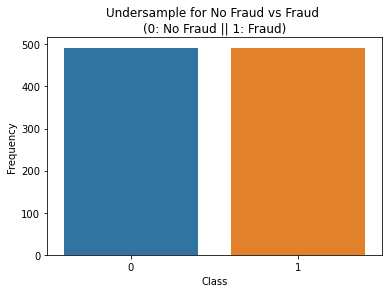

In [17]:
sns.countplot('Class', data = undersample)
plt.title('Undersample for No Fraud vs Fraud \n(0: No Fraud || 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Correlation Matrices Check**

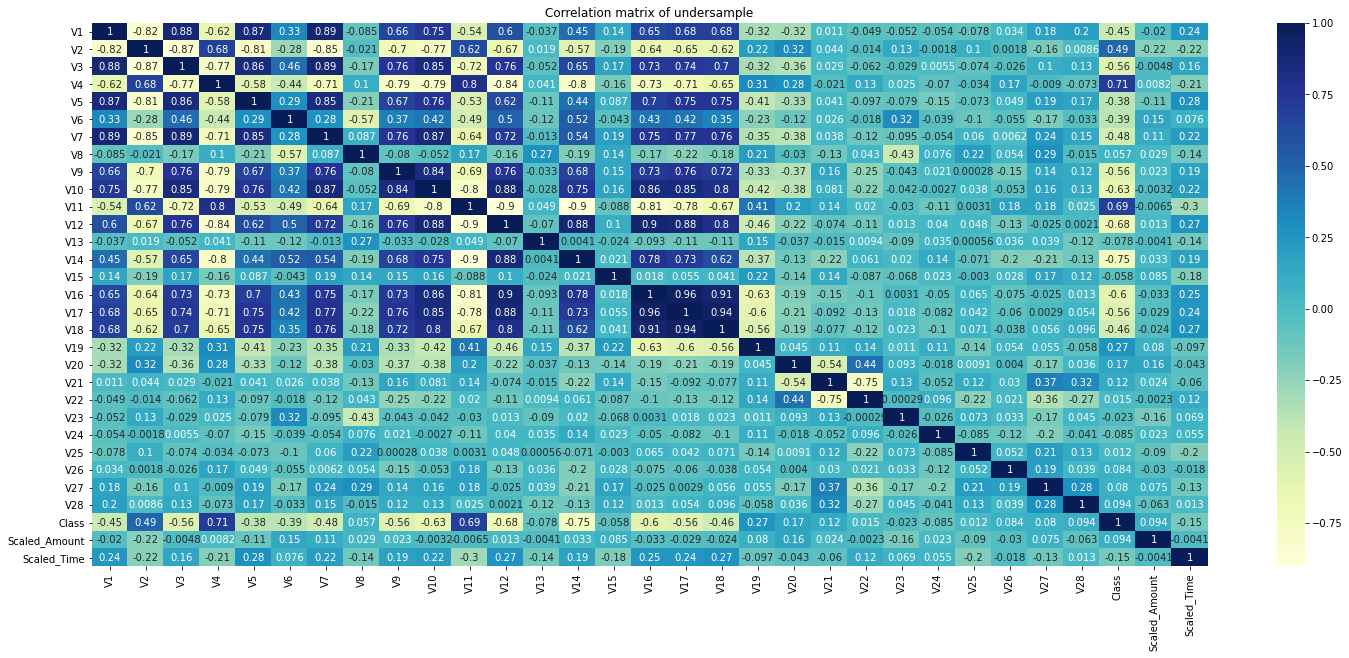

In [18]:
fig,ax = plt.subplots(figsize = (25,10))
underCorr_matrix = undersample.corr()
sns.heatmap(underCorr_matrix, cmap='YlGnBu', vmax = 1.0, annot=True)
plt.title('Correlation matrix of undersample')

plt.show()

In [19]:
print('Top Negative Correlation')
print(underCorr_matrix['Class'].sort_values(ascending=True).head(8))
print('')
print('Top Positive Correlation')
print(underCorr_matrix['Class'].sort_values(ascending=False).head(8))

Top Negative Correlation
V14   -0.749228
V12   -0.682039
V10   -0.628327
V16   -0.597790
V3    -0.564371
V9    -0.559589
V17   -0.559169
V7    -0.477730
Name: Class, dtype: float64

Top Positive Correlation
Class            1.000000
V4               0.712610
V11              0.685056
V2               0.491904
V19              0.267809
V20              0.169025
V21              0.124708
Scaled_Amount    0.094434
Name: Class, dtype: float64


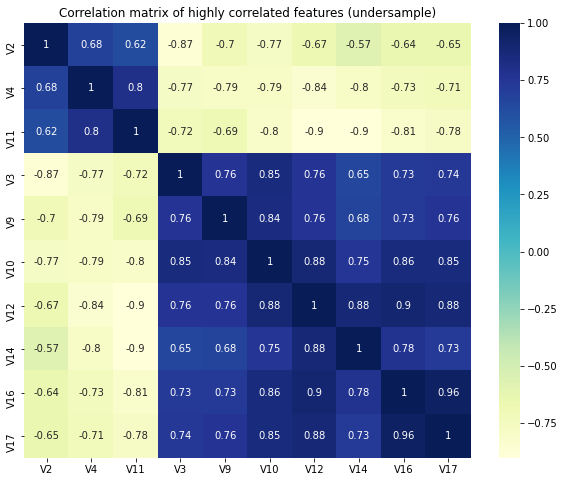

In [20]:
fig,ax = plt.subplots(figsize = (10,8))
feature_correlation = ['V2','V4','V11','V3','V9','V10','V12','V14','V16','V17']
featureCorr_matrix = undersample[feature_correlation].corr()
sns.heatmap(featureCorr_matrix, cmap='YlGnBu', vmax = 1.0, annot=True)
plt.title('Correlation matrix of highly correlated features (undersample)')
plt.show()

The correlation table shows:    
v2, v4, v11 has high positive correlation with Class.     
v3,v9,v10,v12,v14,v16,v17 has negative correlation with Class.    
The higher those values are, the more possible the result will be a fraud transactions.      
We can see the distribution of those feature vs Class in boxplots

Now we will split the undersample dataset and use the train dataset and test dataset. 
- Note: The train dataset split from undersample is not the train dataset split from the original dataset. We will use the train dataset (xtrain_under and ytrain_under) from the undersample to train the model, and use the test dataset (xtrain) to validate the model. 

In [21]:
xunder = undersample.drop('Class', axis = 1)
yunder = undersample.Class

xtrain_under, xtest_under, ytrain_under, ytest_under = train_test_split(xunder, yunder, test_size = 0.20, random_state = seed)

#check the number of data in each set
print('number of data in xtrain_under:', len(xtrain_under))
print('number of data in ytrain_under:', len(ytrain_under))
print('number of data in xtest_under:', len(xtest_under))
print('number of data in ytest_under:', len(ytest_under))

number of data in xtrain_under: 787
number of data in ytrain_under: 787
number of data in xtest_under: 197
number of data in ytest_under: 197


#### *Logistic Regression Using Undersample*

In [22]:
# train the model
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression(max_iter = 1000)
# use the train and test data from undersample to build the model
logreg_under = lr_under.fit(xtrain_under, ytrain_under)

# use xtest from the original dataset to test model to get prediction and probability
logreg_pred_under = logreg_under.predict(xtest)
logreg_pred_prob_under = logreg_under.predict_proba(xtest)

#### *Random Forest Regression Using Undersample*

In [23]:
import time
start = time.time()

from sklearn.ensemble import RandomForestClassifier
# use the train and test data from undersample to build the model
rf_under = RandomForestClassifier(max_depth=100)
randomforest_under = rf_under.fit(xtrain_under, ytrain_under)

# use xtest from the original dataset to test model to get prediction and probability
randomforest_pred_under = randomforest_under.predict(xtest)
randomforest_pred_prob_under = randomforest_under.predict_proba(xtest)

end = time.time()
print(f'runtime of the program is {end - start}')

runtime of the program is 3.836993932723999


#### *Neural Network*

In [24]:
#!pip install keras
#!pip install tensorflow --user
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras import backend as K

model = Sequential()
model.add(Dense(16, activation='tanh', input_dim=30))
model.add(Dropout(0.1))
model.add(Dense(4, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# determin the input_dim by checking shape of the data
xtrain_under.shape

(787, 30)

In [27]:
model_under = Sequential()
model_under.add(Dense(units=16, input_dim= 30, activation='relu'))
model_under.add(Dropout(0.1))
model_under.add(Dense(units=24, activation='relu'))
model_under.add(Dropout(0.1))
model_under.add(Dense(units=20, activation='relu'))
model_under.add(Dense(units=24, activation='relu'))
model_under.add(Dense(units=1, activation='sigmoid'))
model_under.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Accuracy(name='Accuracy')
]

In [29]:
# complie model
model_under.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=metrics)

# fit the model
nn_under = model_under.fit(xtrain_under, ytrain_under, epochs = 3, batch_size = 16, shuffle = True, verbose = 2)

Epoch 1/3
50/50 - 0s - loss: 0.5700 - fn: 46.0000 - fp: 283.0000 - tn: 111.0000 - tp: 347.0000 - precision: 0.5508 - recall: 0.8830 - Accuracy: 0.0000e+00
Epoch 2/3
50/50 - 0s - loss: 0.3853 - fn: 63.0000 - fp: 43.0000 - tn: 351.0000 - tp: 330.0000 - precision: 0.8847 - recall: 0.8397 - Accuracy: 0.0216
Epoch 3/3
50/50 - 0s - loss: 0.2794 - fn: 63.0000 - fp: 11.0000 - tn: 383.0000 - tp: 330.0000 - precision: 0.9677 - recall: 0.8397 - Accuracy: 0.0813


In [30]:
nn_under_pred = model_under.predict(xtest, batch_size = 200, verbose = 0)
nn_under_fraud_pred = model_under.predict_classes(xtest, batch_size = 200, verbose =0)
nn_under_fraud_prob = model_under.predict(xtest)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


#### b) Oversampling
Another way to make fraud and no_fraud data reach 50/50 ratio, is to increase the number of fraud data to match the number of no_fraud data.

In [31]:
# Oversample the fraud records
from sklearn.utils import resample
fraud_oversample = resample(fraud, replace = True, n_samples = len(no_fraud), random_state = 1)
len(fraud_oversample)

# combine fraud and no_fraud_undersample
oversample = pd.concat([fraud_oversample, no_fraud])
oversample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1,-0.293440,-0.828722
107067,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,-4.056293,...,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,1,4.137637,-0.169433
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,...,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,1,0.006567,0.639281
15810,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,-8.233721,...,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1,1.089779,-0.674820
124036,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,...,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,1,1.495144,-0.088558


In [32]:
oversample['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

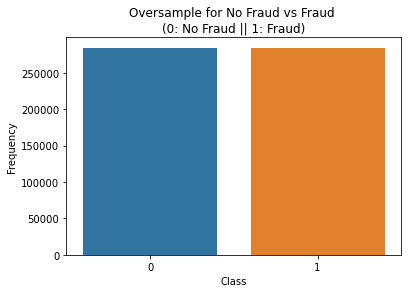

In [33]:
sns.countplot('Class', data = oversample)
plt.title('Oversample for No Fraud vs Fraud \n(0: No Fraud || 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Correlation Matrices Check**

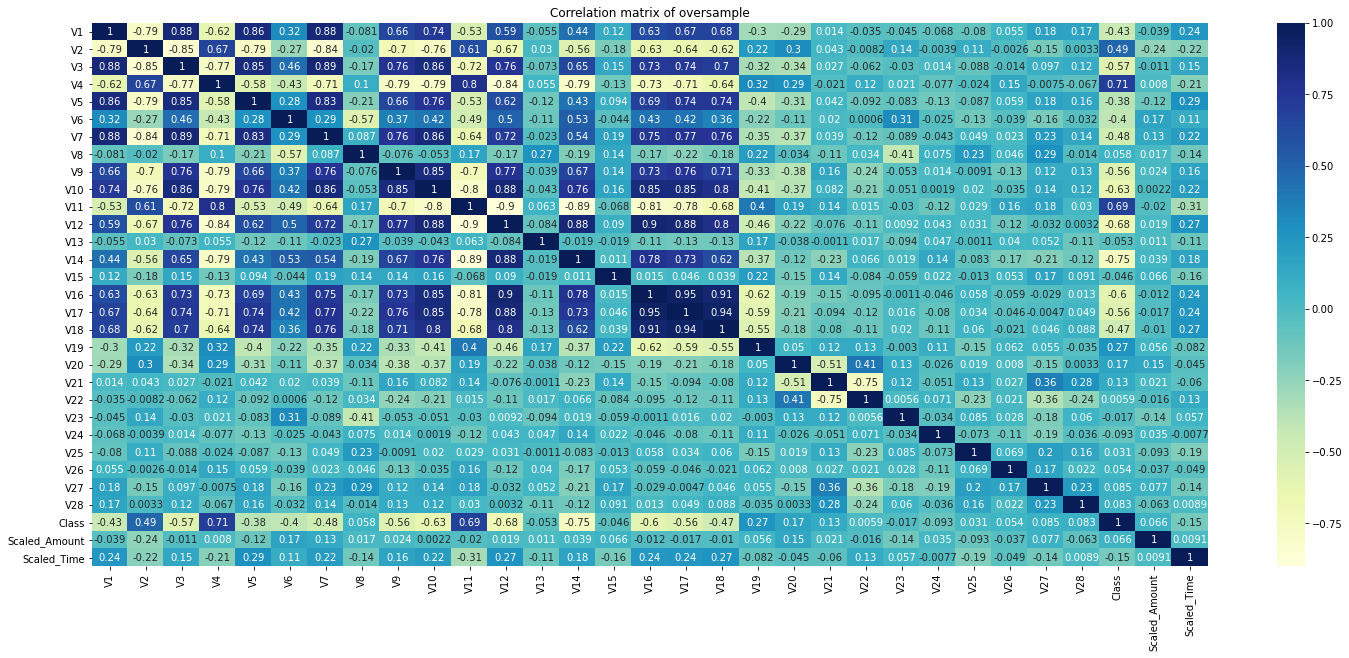

In [34]:
fig,ax = plt.subplots(figsize = (25,10))
overCorr_matrix = oversample.corr()
sns.heatmap(overCorr_matrix, cmap='YlGnBu', vmax = 1.0, annot=True)
plt.title('Correlation matrix of oversample')

plt.show()

The correlation table shows:     
V2,V4 V11 has high positive correlation with Class.     
v3,v9,v10,v12,v14,v16,v17 has negative correlation with Class.      
The higher those values are, the more possible the result will be a fraud transactions.      
We can see the distribution of those feature vs Class in boxplots


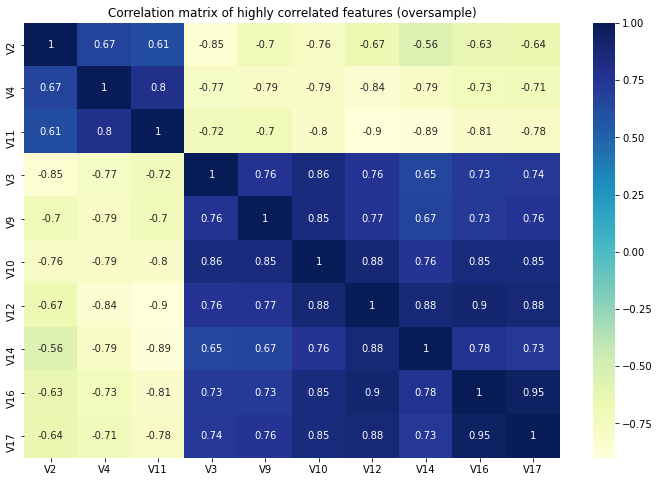

In [35]:
fig,ax = plt.subplots(figsize = (12,8))
feature_over_correlation = ['V2','V4','V11','V3','V9','V10','V12','V14','V16','V17']
featureCorr_over_matrix = oversample[feature_over_correlation].corr()
sns.heatmap(featureCorr_over_matrix, cmap='YlGnBu', vmax = 1.0, annot=True)
plt.title('Correlation matrix of highly correlated features (oversample)')
plt.show()

Now we will split the oversample dataset and use the train dataset and test dataset.

- Note: The train dataset split from oversample is not the train dataset split from the original dataset. We will use the train dataset (xtrain_over and ytrain_over) from the oversample to train the model, and use the test dataset (xtrain) to validate the model.



In [36]:
xover = oversample.drop('Class', axis = 1)
yover = oversample.Class

xtrain_over, xtest_over, ytrain_over, ytest_over = train_test_split(xover, yover, test_size = 0.20, random_state = seed)

#check the number of data in each set
print('number of data in xtrain_over:', len(xtrain_over))
print('number of data in ytrain_over:', len(ytrain_over))
print('number of data in xtest_over:', len(xtest_over))
print('number of data in ytest_over:', len(ytest_over))

number of data in xtrain_over: 454904
number of data in ytrain_over: 454904
number of data in xtest_over: 113726
number of data in ytest_over: 113726


#### *Logistic Regression Using Oversample*

In [37]:
import time
start = time.time()

# train the model
lr_over = LogisticRegression(max_iter = 1000)
# use the train and test data from undersample to build the model
logreg_over = lr_over.fit(xtrain_over, ytrain_over)

# use xtest from the original dataset to test model to get prediction and probability
logreg_pred_over = logreg_over.predict(xtest)
logreg_pred_prob_over = logreg_over.predict_proba(xtest)

end = time.time()
print(f'runtime of the program is {end - start}')

runtime of the program is 13.503000020980835


#### *Random Forest Regression Using Undersample*

In [38]:
import time
start = time.time()

from sklearn.ensemble import RandomForestClassifier
# use the train and test data from oversample to build the model
rf_over = RandomForestClassifier(max_depth=100)
randomforest_over = rf_over.fit(xtrain_over, ytrain_over)

# use xtest from the original dataset to test model to get prediction and probability
randomforest_pred_over = randomforest_over.predict(xtest)
randomforest_pred_prob_over = randomforest_over.predict_proba(xtest)

end = time.time()
print(f'runtime of the program is {end - start}')

runtime of the program is 536.8706772327423


#### *Neural Network*

In [39]:
model_over = Sequential()
model_over.add(Dense(units=16, input_dim= 30, activation='relu'))
model_over.add(Dense(units=24, activation='relu'))
model_over.add(Dropout(0.5))
model_over.add(Dense(units=20, activation='relu'))
model_over.add(Dense(units=24, activation='relu'))
model_over.add(Dense(units=1, activation='sigmoid'))
model_over.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [40]:
xtrain_over.shape

(454904, 30)

In [41]:
# complie model
model_over.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=metrics)

# fit the model
nn_over = model_over.fit(xtrain_over, ytrain_over, epochs = 3, batch_size = 16, shuffle = True, verbose = 2)

Epoch 1/3
28432/28432 - 66s - loss: 0.0650 - fn: 3471.0000 - fp: 5940.0000 - tn: 221789.0000 - tp: 224491.0000 - precision: 0.9742 - recall: 0.9848 - Accuracy: 0.4407
Epoch 2/3
28432/28432 - 67s - loss: 0.0425 - fn: 881.0000 - fp: 3682.0000 - tn: 223653.0000 - tp: 226688.0000 - precision: 0.9840 - recall: 0.9961 - Accuracy: 0.6020
Epoch 3/3
28432/28432 - 65s - loss: 0.0410 - fn: 693.0000 - fp: 3167.0000 - tn: 224168.0000 - tp: 226876.0000 - precision: 0.9862 - recall: 0.9970 - Accuracy: 0.6508


In [42]:
nn_over_pred = model_over.predict(xtest, batch_size = 200, verbose = 0)
nn_over_fraud_pred = model_over.predict_classes(xtest, batch_size = 200, verbose =0)
nn_over_fraud_prob = model_over.predict(xtest)

### 3. Prediction Evaluation

#### 3.1 Comparison Models Using Undersample      
#### a) Comparison of Classification report

In [43]:
# verify the model using ytest from original data
from sklearn.metrics import classification_report
print('Logistic Regression:')
print(classification_report(ytest,logreg_pred_under,target_names = ['0', '1']))
print('Random Forest Regression:')
print(classification_report(ytest,randomforest_pred_under,target_names = ['0', '1']))
print('Neural Network:')
print(classification_report(ytest,nn_under_fraud_pred,target_names = ['0', '1']))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Random Forest Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.97      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.97      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Neural Network:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.89      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted av

#### b) Comparison of Confusion Matrix

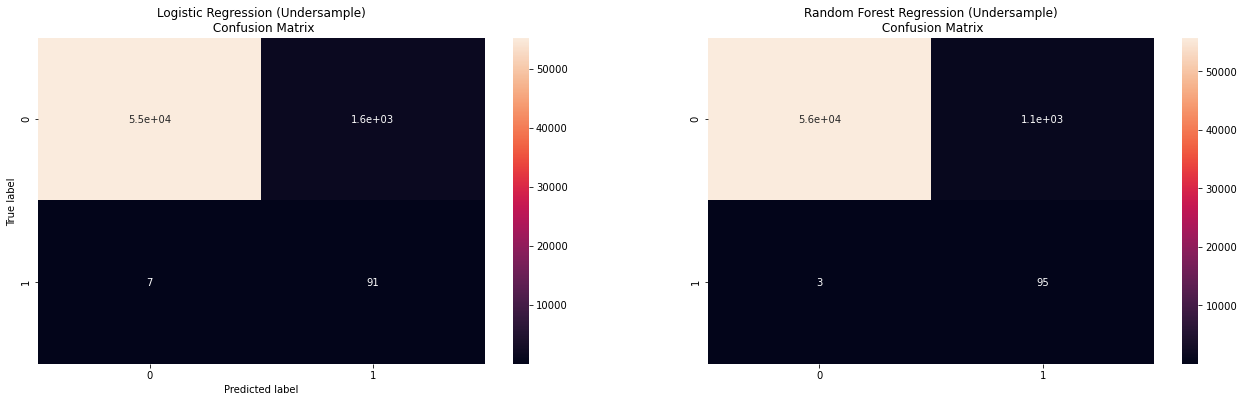

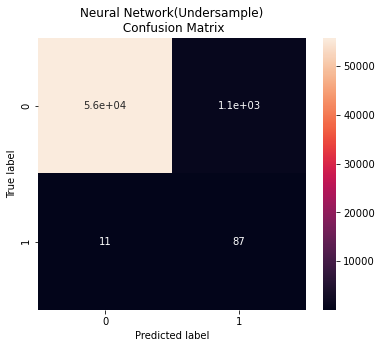

In [44]:
#Calculate confusion matrix value for three model
from sklearn.metrics import confusion_matrix
lg_under=confusion_matrix(ytest,logreg_pred_under)
rf_under=confusion_matrix(ytest,randomforest_pred_under)
cm_under=confusion_matrix(ytest,nn_under_fraud_pred)

# plot all three matrix
fig, ax = plt.subplots(1,2, figsize = (22,6))
sns.heatmap(lg_under, ax=ax[0], annot = True)
ax[0].set_title('Logistic Regression (Undersample)\n Confusion Matrix')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

sns.heatmap(rf_under, ax=ax[1], annot = True)
ax[1].set_title('Random Forest Regression (Undersample)\n Confusion Matrix')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

fig,ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_under, annot = True)
plt.title('Neural Network(Undersample)\n Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

#### c) Comparison of ROC curve

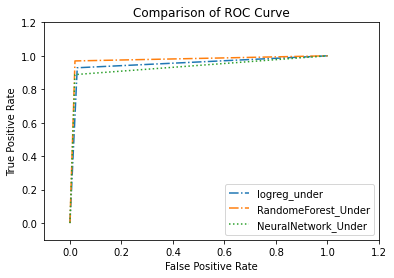

In [45]:
# get auc value
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc_log_under = roc_auc_score(ytest,logreg_pred_under)
auc_log_under = roc_auc_score(ytest,randomforest_pred_under)
auc_log_under = roc_auc_score(ytest,nn_under_fraud_pred)

# calculate roc curves
log_under_fpr, log_under_tpr, log_threshold = roc_curve(ytest, logreg_pred_under)
randomforest_under_fpr, randomforest_under_tpr, randomforest_threshold = roc_curve(ytest, randomforest_pred_under)
nn_under_fpr, nn_under_tpr, nn_threshold = roc_curve(ytest, nn_under_fraud_pred)

#then plot the roc curve
from matplotlib import pyplot
pyplot.plot(log_under_fpr, log_under_tpr, linestyle ='-.', label ='logreg_under')
pyplot.plot(randomforest_under_fpr, randomforest_under_tpr, linestyle ='-.', label ='RandomeForest_Under')
pyplot.plot(nn_under_fpr, nn_under_tpr, linestyle =':', label ='NeuralNetwork_Under')

#add label and ledgend
pyplot.legend()
plt.title('Comparison of ROC Curve')
plt.legend(loc='lower right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

From the above curve it can be seen that Neural Network has the highest area uder the ROC curve and hence, seems to be the best model according to this metric.      
RandomForest regression method has a highest recall rate which means the fradu transaction detection rate is high, although the precison is not since it labeled a few no-fraud transaction as fruad.

#### 3.2 Comparison Models using Oversample

#### a) Comparison of Classification report

In [46]:
print('Logistic Regression:')
print(classification_report(ytest,logreg_pred_over,target_names = ['0', '1']))
print('RandomForest Regression:')
print(classification_report(ytest,randomforest_pred_over,target_names = ['0', '1']))
print('Neural Network:')
print(classification_report(ytest,nn_over_fraud_pred,target_names = ['0', '1']))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

RandomForest Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      1.00      0.99        98

    accuracy                           1.00     56962
   macro avg       0.99      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

Neural Network:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      1.00      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.99      0.61     56962
weighted avg

#### b) Comparison of Confusion Matrix

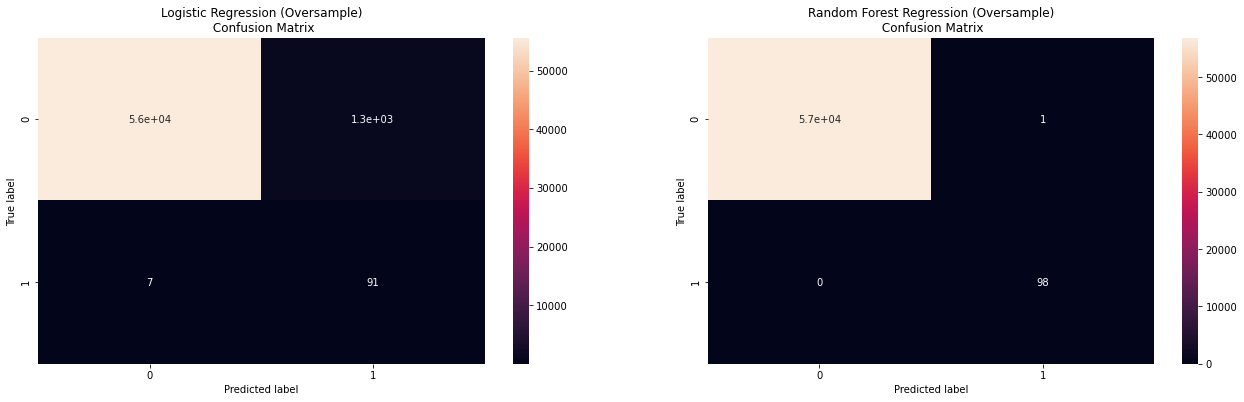

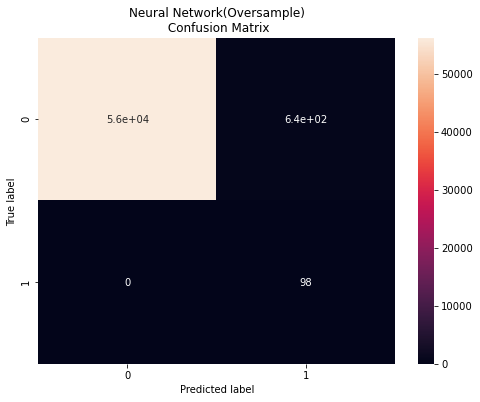

In [51]:
#Calculate confusion matrix value for three model
from sklearn.metrics import confusion_matrix
lg_over=confusion_matrix(ytest,logreg_pred_over)
rf_over=confusion_matrix(ytest,randomforest_pred_over)
cm_over=confusion_matrix(ytest,nn_over_fraud_pred)

# plot all three matrix
fig, ax = plt.subplots(1,2, figsize = (22,6))
sns.heatmap(lg_over, ax=ax[0], annot = True)
ax[0].set_title('Logistic Regression (Oversample)\n Confusion Matrix')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

sns.heatmap(rf_over, ax=ax[1], annot = True)
ax[1].set_title('Random Forest Regression (Oversample)\n Confusion Matrix')
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')

fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(cm_over, annot = True)
plt.title('Neural Network(Oversample)\n Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

#### c) Comparison of ROC curve

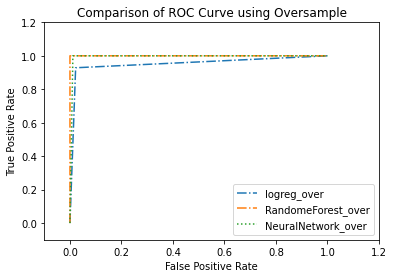

In [52]:
# get auc value
auc_log_over = roc_auc_score(ytest,logreg_pred_over)
auc_log_over = roc_auc_score(ytest,randomforest_pred_over)
auc_log_over = roc_auc_score(ytest,nn_over_fraud_pred)

# calculate roc curves
log_over_fpr, log_over_tpr, log_threshold_over = roc_curve(ytest, logreg_pred_over)
randomforest_over_fpr, randomforest_over_tpr, randomforest_threshold_over = roc_curve(ytest, randomforest_pred_over)
nn_over_fpr, nn_over_tpr, nn_threshold_over = roc_curve(ytest, nn_over_fraud_pred)

#then plot the roc curve
from matplotlib import pyplot
pyplot.plot(log_over_fpr, log_over_tpr, linestyle ='-.', label ='logreg_over')
pyplot.plot(randomforest_over_fpr, randomforest_over_tpr, linestyle ='-.', label ='RandomeForest_over')
pyplot.plot(nn_over_fpr, nn_over_tpr, linestyle =':', label ='NeuralNetwork_over')

#add label and ledgend
pyplot.legend()
plt.title('Comparison of ROC Curve using Oversample')
plt.legend(loc='lower right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

From the above curve it can be seen that RandomForest Regression and neural network are has very close ROC curve, and those two methods all have 100% recall rate, which means those two methods can detect all the fraud transaction. In comparison, random forest regression method has higher precision rate than neural network. Thus, random forest seems to be the best model according to this metric.

### 4. Conclusion:       
In this notebook, we used various predictive models to detect fraud transactions.           
We started with an exploratory data analysis, and we found our data was a very imbalanced dataset with 0.17% of fraud transactions. We created a naive prediction model and proved that using an accuracy metric was misleading. F1 score, AUC, precision, and recall should be the proper metrics for evaluating the model performance in this case.             
To properly train the model, we used the undersampling and oversampling technique to make the fraud and no fraud transaction reach a 50/50 ratio. Then we built three predictive models using a down-sized sample and an up-sized sample. In the end, we used the test data set from the original dataset to evaluate the model performance. Since we want to test the model in a real-life situation - a highly imbalanced dataset, we don't want to use test data set from either a down-sized sample or an up-sized sample.                 
In a down-sized sample, random forest achieved the highest f1 score. The random forest method also got the highest recall rate, which means this model detects most fraud transactions among the three. However, this model doesn't have a high precision rate that it labeled a few no-fraud transactions as fraud.             
In the up-sized sample, both the random forest and the neural network model have the perfect recall rate, which means those two models detected all the fraud transactions. The random forest regression model has a higher precision rate and f1 scores, which means the random forest model less wrongly labeled the no-fraud transactions than the neural network model.             